# Lab 04 : Test set evaluation -- demo

In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/CS5242_2026_codes/labs_lecture04/lab04_test_set'
    print(path_to_file)
    # change current path to the folder containing "file_name"
    os.chdir(path_to_file)
    !pwd

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from random import randint
import utils

### Download the data and print the sizes

In [3]:
from utils import check_mnist_dataset_exists
data_path=check_mnist_dataset_exists()

train_data=torch.load(data_path+'mnist/train_data.pt')
train_label=torch.load(data_path+'mnist/train_label.pt')
test_data=torch.load(data_path+'mnist/test_data.pt')
test_label=torch.load(data_path+'mnist/test_label.pt')

### Make a ONE layer net class. 

In [4]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        self.linear_layer = nn.Linear( input_size, output_size , bias=False)
        
    def forward(self, x):
        scores = self.linear_layer(x)
        return scores

### Build the net

In [5]:
net=one_layer_net(784,10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


### Choose the criterion, optimizer, batchsize, learning rate

In [6]:
criterion = nn.CrossEntropyLoss()

optimizer=torch.optim.SGD( net.parameters() , lr=0.01 )

bs=200

### Do 30 passes through the training set

In [7]:
for epoch in range(30):
    
    running_loss=0
    running_error=0
    num_batches=0
    
    shuffled_indices=torch.randperm(60000)
 
    for count in range(0,60000,bs):
    
        optimizer.zero_grad()
        
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        inputs = minibatch_data.view(bs,784)

        inputs.requires_grad_()

        scores=net( inputs ) 

        loss =  criterion( scores , minibatch_label) 
        
        loss.backward()

        optimizer.step()
        
        
        # compute and accumulate stats
        
        running_loss += loss.detach().item()
               
        error = utils.get_error( scores.detach() , minibatch_label)
        running_error += error.item()
        
        num_batches+=1
    
    
    # compute stats for the full training set
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    
    print('epoch=',epoch, '\t loss=', total_loss , '\t error=', total_error*100 ,'percent')

epoch= 0 	 loss= 1.4488453749815624 	 error= 27.969999889532726 percent
epoch= 1 	 loss= 0.8528359719117482 	 error= 16.87500007947286 percent
epoch= 2 	 loss= 0.6860179104407629 	 error= 14.948333124319714 percent
epoch= 3 	 loss= 0.6049698293209076 	 error= 13.966666519641876 percent
epoch= 4 	 loss= 0.5557641891638437 	 error= 13.34333316485087 percent
epoch= 5 	 loss= 0.5220973799626033 	 error= 12.914999882380169 percent
epoch= 6 	 loss= 0.4973400233189265 	 error= 12.543333371480307 percent
epoch= 7 	 loss= 0.47816444079081216 	 error= 12.203333338101704 percent
epoch= 8 	 loss= 0.4627925373117129 	 error= 11.91833339134852 percent
epoch= 9 	 loss= 0.45012340277433394 	 error= 11.698333462079367 percent
epoch= 10 	 loss= 0.43943443953990935 	 error= 11.52666691939036 percent
epoch= 11 	 loss= 0.43027731170256933 	 error= 11.36166689793269 percent
epoch= 12 	 loss= 0.42230197856823604 	 error= 11.206666926542917 percent
epoch= 13 	 loss= 0.41529909590880076 	 error= 11.09166695674

### Now that the network is trained and do 10% of error on the training set, we are going to see how well it is doing on the test set...

In [ ]:
running_error = 0
num_batches = 0

for i in range(0, 10000, bs):

    # extract the minibatch
    minibatch_data = test_data[i:i+bs]
    minibatch_label = test_label[i:i+bs]

    # reshape the minibatch
    inputs = minibatch_data.view(bs, 784)

    # feed it to the network
    scores = net(inputs)

    # compute the error made on this batch
    error = utils.get_error(scores, minibatch_label)
    
    # add it to the running error
    running_error += error.item()

    num_batches+=1

# compute error rate on the full test set
total_error = running_error/num_batches

print( 'error rate on test set =', total_error*100 ,'percent')

error rate on test set = 9.25 percent


### Choose image at random from the test set and see how good/bad are the predictions

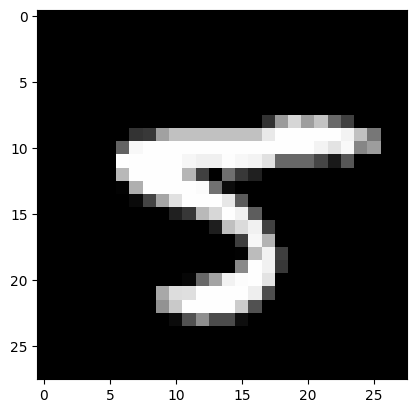

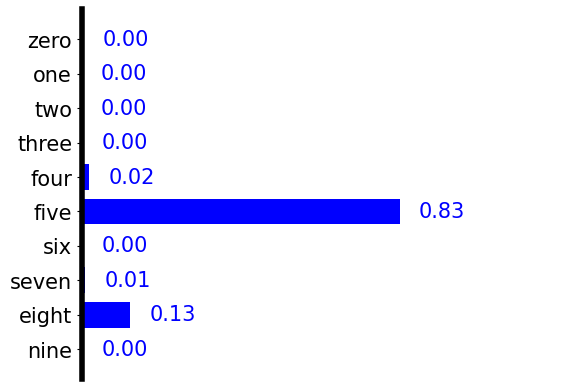

In [9]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
scores =  net( im.view(1,784)) 
probs= torch.softmax(scores, dim=1)
utils.show_prob_mnist(probs)